In [1]:
import pandas as pd
from warnings import simplefilter
simplefilter(action='ignore', category = FutureWarning)
from warnings import simplefilter
simplefilter(action='ignore', category = FutureWarning)
%matplotlib inline

In [2]:
df = pd.read_csv('processed.cleveland.csv', header = None)

df.columns = ['age', 'sex', 'cp', 'trestbps', 'chol',
              'fbs', 'restecg', 'thalach', 'exang', 
              'oldpeak', 'slope', 'ca', 'thal', 'target']

In [3]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,57,0,4,140,241,0,0,123,1,0.2,2,0,7,1
293,45,1,1,110,264,0,0,132,0,1.2,2,0,7,1
294,68,1,4,144,193,1,0,141,0,3.4,2,2,7,2
295,57,1,4,130,131,0,0,115,1,1.2,2,1,7,3


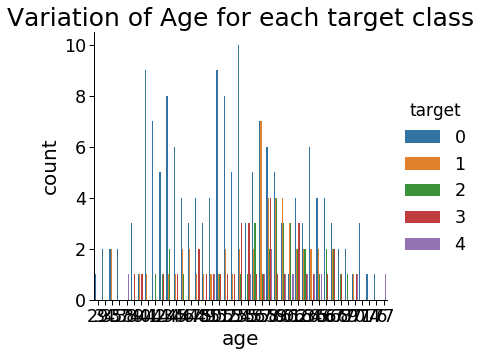

In [4]:
### 1 = male, 0 = female
df.isnull().sum()

df['target'] = df.target.map({0: 0, 1: 1, 2: 2, 3: 3, 4: 4})
df['sex'] = df.sex.map({0: 'female', 1: 'male'})

df['thal'] = df.thal.fillna(df.thal.mean())
df['ca'] = df.ca.fillna(df.ca.mean())

import matplotlib.pyplot as plt
import seaborn as sns

# distribution of target vs age 
sns.set_context("paper", font_scale = 2, rc = {"font.size": 20,"axes.titlesize": 25,"axes.labelsize": 20}) 
sns.catplot(kind = 'count', data = df, x = 'age', hue = 'target', order = df['age'].sort_values().unique())
plt.title('Variation of Age for each target class')
plt.show()

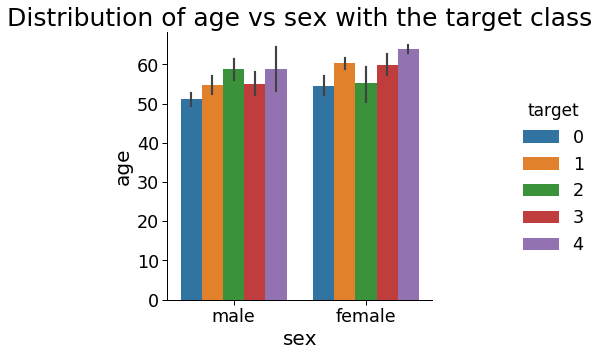

In [5]:
 
# barplot of age vs sex with hue = target
sns.catplot(kind = 'bar', data = df, y = 'age', x = 'sex', hue = 'target')
plt.title('Distribution of age vs sex with the target class')
plt.show()

In [6]:
df['sex'] = df.sex.map({'female': 0, 'male': 1})

In [7]:
#########################################   Logistic Regression  #############################################################
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
cm_test = confusion_matrix(y_pred, y_test)

y_pred_train = classifier.predict(X_train)
cm_train = confusion_matrix(y_pred_train, y_train)

print()
print('Accuracy for training set for Logistic Regression = {}'.format((cm_train[0][0] + cm_train[1][1])/len(y_train)))
print('Accuracy for test set for Logistic Regression = {}'.format((cm_test[0][0] + cm_test[1][1])/len(y_test)))


Accuracy for training set for Logistic Regression = 0.5611814345991561
Accuracy for test set for Logistic Regression = 0.5


In [8]:
################################## data preprocessing
x = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

from sklearn.preprocessing import StandardScaler as ss
sc = ss()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#########################################   SVM   #############################################################
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf')
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
cm_test = confusion_matrix(y_pred, y_test)

y_pred_train = classifier.predict(X_train)
cm_train = confusion_matrix(y_pred_train, y_train)

print('Accuracy for training set for svm = {}'.format((cm_train[0][0] + cm_train[1][1])/len(y_train)))
print('Accuracy for test set for svm = {}'.format((cm_test[0][0] + cm_test[1][1])/len(y_test)))

Accuracy for training set for svm = 0.6160337552742616
Accuracy for test set for svm = 0.5166666666666667


In [9]:
#########################################   Naive Bayes  #############################################################
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)


# Predicting the Test set results
y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
cm_test = confusion_matrix(y_pred, y_test)

y_pred_train = classifier.predict(X_train)
cm_train = confusion_matrix(y_pred_train, y_train)

print()
print('Accuracy for training set for Naive Bayes = {}'.format((cm_train[0][0] + cm_train[1][1])/len(y_train)))
print('Accuracy for test set for Naive Bayes = {}'.format((cm_test[0][0] + cm_test[1][1])/len(y_test)))


Accuracy for training set for Naive Bayes = 0.540084388185654
Accuracy for test set for Naive Bayes = 0.48333333333333334


In [10]:
#########################################   Decision Tree  #############################################################
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
cm_test = confusion_matrix(y_pred, y_test)

y_pred_train = classifier.predict(X_train)
cm_train = confusion_matrix(y_pred_train, y_train)

print()
print('Accuracy for training set for Decision Tree = {}'.format((cm_train[0][0] + cm_train[1][1])/len(y_train)))
print('Accuracy for test set for Decision Tree = {}'.format((cm_test[0][0] + cm_test[1][1])/len(y_test)))


Accuracy for training set for Decision Tree = 0.7257383966244726
Accuracy for test set for Decision Tree = 0.4


In [11]:
#########################################  Random Forest  #############################################################
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
cm_test = confusion_matrix(y_pred, y_test)

y_pred_train = classifier.predict(X_train)
cm_train = confusion_matrix(y_pred_train, y_train)

print()
print('Accuracy for training set for Random Forest = {}'.format((cm_train[0][0] + cm_train[1][1])/len(y_train)))
print('Accuracy for test set for Random Forest = {}'.format((cm_test[0][0] + cm_test[1][1])/len(y_test)))


Accuracy for training set for Random Forest = 0.7215189873417721
Accuracy for test set for Random Forest = 0.45


In [12]:
###############################################################################
# applying lightGBM
import lightgbm as lgb

d_train = lgb.Dataset(X_train, label = y_train)
params = {}

clf = lgb.train(params, d_train, 100)
#Prediction
y_pred = clf.predict(X_test)
#convert into binary values
for i in range(0, len(y_pred)):
    if y_pred[i]>= 0.5:       # setting threshold to .5
       y_pred[i]=1
    else:  
       y_pred[i]=0
       
from sklearn.metrics import confusion_matrix
cm_test = confusion_matrix(y_pred, y_test)

y_pred_train = clf.predict(X_train)

for i in range(0, len(y_pred_train)):
    if y_pred_train[i]>= 0.5:       # setting threshold to .5
       y_pred_train[i]=1
    else:  
       y_pred_train[i]=0
       
cm_train = confusion_matrix(y_pred_train, y_train)
print()
print('Accuracy for training set for LightGBM = {}'.format((cm_train[0][0] + cm_train[1][1])/len(y_train)))
print('Accuracy for test set for LightGBM = {}'.format((cm_test[0][0] + cm_test[1][1])/len(y_test)))


Accuracy for training set for LightGBM = 0.6666666666666666
Accuracy for test set for LightGBM = 0.5166666666666667


In [13]:
###############################################################################
# applying XGBoost

#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X, target, test_size = 0.20, random_state = 0)

from xgboost import XGBClassifier
xg = XGBClassifier()
xg.fit(X_train, y_train)
y_pred = xg.predict(X_test)

from sklearn.metrics import confusion_matrix
cm_test = confusion_matrix(y_pred, y_test)

y_pred_train = xg.predict(X_train)

for i in range(0, len(y_pred_train)):
    if y_pred_train[i]>= 0.5:       # setting threshold to .5
       y_pred_train[i]=1
    else:  
       y_pred_train[i]=0
       
cm_train = confusion_matrix(y_pred_train, y_train)
print()
print('Accuracy for training set for XGBoost = {}'.format((cm_train[0][0] + cm_train[1][1])/len(y_train)))
print('Accuracy for test set for XGBoost = {}'.format((cm_test[0][0] + cm_test[1][1])/len(y_test)))


Accuracy for training set for XGBoost = 0.7215189873417721
Accuracy for test set for XGBoost = 0.45


In [14]:
from sklearn.cluster import KMeans

In [15]:
km=KMeans(5)
km.fit(X_train,y_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [17]:
from sklearn import metrics
print(metrics.classification_report(y_test,km.predict(X_test)))

              precision    recall  f1-score   support

           0       0.53      0.33      0.41        30
           1       0.15      0.17      0.16        12
           2       0.50      0.14      0.22         7
           3       0.00      0.00      0.00         6
           4       0.17      0.40      0.24         5

    accuracy                           0.25        60
   macro avg       0.27      0.21      0.21        60
weighted avg       0.37      0.25      0.28        60



multi class classification without any feature extraction 

In [19]:
import pandas as pd
import numpy as np

from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [20]:
model=Sequential()
model.add(Dense(10,activation="relu",input_dim=13))
model.add(Dense(8,activation="relu"))
model.add(Dense(6,activation="relu"))
model.add(Dense(5,activation="softmax"))

In [21]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [22]:
model.fit(X_train,y_train,epochs=500)

Train on 237 samples
Epoch 1/500
237/237 [==============================] - 1s 3ms/sample - loss: 25.0275 - accuracy: 0.5485
Epoch 2/500
237/237 [==============================] - 0s 105us/sample - loss: 20.9844 - accuracy: 0.5485
Epoch 3/500
237/237 [==============================] - 0s 100us/sample - loss: 17.2571 - accuracy: 0.5485
Epoch 4/500
237/237 [==============================] - 0s 89us/sample - loss: 14.3626 - accuracy: 0.5485
Epoch 5/500
237/237 [==============================] - 0s 109us/sample - loss: 11.7779 - accuracy: 0.5485
Epoch 6/500
237/237 [==============================] - 0s 126us/sample - loss: 9.6352 - accuracy: 0.5485
Epoch 7/500
237/237 [==============================] - 0s 102us/sample - loss: 7.7722 - accuracy: 0.5485
Epoch 8/500
237/237 [==============================] - 0s 122us/sample - loss: 6.0861 - accuracy: 0.5485
Epoch 9/500
237/237 [==============================] - 0s 125us/sample - loss: 4.5421 - accuracy: 0.5443
Epoch 10/500
237/237 [==========

237/237 [==============================] - 0s 95us/sample - loss: 1.1261 - accuracy: 0.5738
Epoch 79/500
237/237 [==============================] - 0s 80us/sample - loss: 1.1220 - accuracy: 0.5823
Epoch 80/500
237/237 [==============================] - 0s 73us/sample - loss: 1.1223 - accuracy: 0.5907
Epoch 81/500
237/237 [==============================] - 0s 81us/sample - loss: 1.1337 - accuracy: 0.5527
Epoch 82/500
237/237 [==============================] - 0s 85us/sample - loss: 1.1289 - accuracy: 0.5738
Epoch 83/500
237/237 [==============================] - 0s 84us/sample - loss: 1.1297 - accuracy: 0.5443
Epoch 84/500
237/237 [==============================] - 0s 77us/sample - loss: 1.1332 - accuracy: 0.5696
Epoch 85/500
237/237 [==============================] - 0s 91us/sample - loss: 1.1400 - accuracy: 0.5527
Epoch 86/500
237/237 [==============================] - 0s 81us/sample - loss: 1.1071 - accuracy: 0.5781
Epoch 87/500
237/237 [==============================] - 0s 81us/samp

237/237 [==============================] - 0s 59us/sample - loss: 0.9436 - accuracy: 0.6034
Epoch 156/500
237/237 [==============================] - 0s 56us/sample - loss: 0.9420 - accuracy: 0.6203
Epoch 157/500
237/237 [==============================] - 0s 52us/sample - loss: 0.9383 - accuracy: 0.6203
Epoch 158/500
237/237 [==============================] - 0s 59us/sample - loss: 0.9449 - accuracy: 0.5992
Epoch 159/500
237/237 [==============================] - 0s 64us/sample - loss: 0.9379 - accuracy: 0.6203
Epoch 160/500
237/237 [==============================] - 0s 69us/sample - loss: 0.9512 - accuracy: 0.6118
Epoch 161/500
237/237 [==============================] - 0s 72us/sample - loss: 0.9627 - accuracy: 0.6245
Epoch 162/500
237/237 [==============================] - 0s 65us/sample - loss: 0.9677 - accuracy: 0.6118
Epoch 163/500
237/237 [==============================] - 0s 62us/sample - loss: 0.9513 - accuracy: 0.6203
Epoch 164/500
237/237 [==============================] - 0s 

237/237 [==============================] - 0s 73us/sample - loss: 0.9068 - accuracy: 0.6414
Epoch 233/500
237/237 [==============================] - 0s 68us/sample - loss: 0.8886 - accuracy: 0.6329
Epoch 234/500
237/237 [==============================] - 0s 67us/sample - loss: 0.8829 - accuracy: 0.6582
Epoch 235/500
237/237 [==============================] - 0s 67us/sample - loss: 0.8816 - accuracy: 0.6498
Epoch 236/500
237/237 [==============================] - 0s 71us/sample - loss: 0.8845 - accuracy: 0.6371
Epoch 237/500
237/237 [==============================] - 0s 65us/sample - loss: 0.8828 - accuracy: 0.6371
Epoch 238/500
237/237 [==============================] - 0s 57us/sample - loss: 0.8855 - accuracy: 0.6498
Epoch 239/500
237/237 [==============================] - 0s 65us/sample - loss: 0.8830 - accuracy: 0.6414
Epoch 240/500
237/237 [==============================] - 0s 63us/sample - loss: 0.8895 - accuracy: 0.6371
Epoch 241/500
237/237 [==============================] - 0s 

237/237 [==============================] - 0s 59us/sample - loss: 0.9149 - accuracy: 0.6245
Epoch 310/500
237/237 [==============================] - 0s 66us/sample - loss: 0.9057 - accuracy: 0.6287
Epoch 311/500
237/237 [==============================] - 0s 66us/sample - loss: 0.8981 - accuracy: 0.6414
Epoch 312/500
237/237 [==============================] - 0s 65us/sample - loss: 0.8781 - accuracy: 0.6414
Epoch 313/500
237/237 [==============================] - 0s 70us/sample - loss: 0.8755 - accuracy: 0.6414
Epoch 314/500
237/237 [==============================] - 0s 63us/sample - loss: 0.8939 - accuracy: 0.6456
Epoch 315/500
237/237 [==============================] - 0s 65us/sample - loss: 0.8638 - accuracy: 0.6498
Epoch 316/500
237/237 [==============================] - 0s 70us/sample - loss: 0.8617 - accuracy: 0.6582
Epoch 317/500
237/237 [==============================] - 0s 64us/sample - loss: 0.8682 - accuracy: 0.6456
Epoch 318/500
237/237 [==============================] - 0s 

237/237 [==============================] - 0s 59us/sample - loss: 0.8813 - accuracy: 0.6414
Epoch 387/500
237/237 [==============================] - 0s 50us/sample - loss: 0.8626 - accuracy: 0.6540
Epoch 388/500
237/237 [==============================] - 0s 54us/sample - loss: 0.8587 - accuracy: 0.6371
Epoch 389/500
237/237 [==============================] - 0s 59us/sample - loss: 0.8539 - accuracy: 0.6582
Epoch 390/500
237/237 [==============================] - 0s 59us/sample - loss: 0.8503 - accuracy: 0.6624
Epoch 391/500
237/237 [==============================] - 0s 66us/sample - loss: 0.8495 - accuracy: 0.6582
Epoch 392/500
237/237 [==============================] - 0s 62us/sample - loss: 0.8622 - accuracy: 0.6414
Epoch 393/500
237/237 [==============================] - 0s 64us/sample - loss: 0.8600 - accuracy: 0.6498
Epoch 394/500
237/237 [==============================] - 0s 60us/sample - loss: 0.8729 - accuracy: 0.6245
Epoch 395/500
237/237 [==============================] - 0s 

237/237 [==============================] - 0s 61us/sample - loss: 0.8499 - accuracy: 0.6456
Epoch 464/500
237/237 [==============================] - 0s 72us/sample - loss: 0.8400 - accuracy: 0.6540
Epoch 465/500
237/237 [==============================] - 0s 72us/sample - loss: 0.8451 - accuracy: 0.6456
Epoch 466/500
237/237 [==============================] - 0s 67us/sample - loss: 0.8430 - accuracy: 0.6498
Epoch 467/500
237/237 [==============================] - 0s 73us/sample - loss: 0.8454 - accuracy: 0.6540
Epoch 468/500
237/237 [==============================] - 0s 72us/sample - loss: 0.8448 - accuracy: 0.6498
Epoch 469/500
237/237 [==============================] - 0s 69us/sample - loss: 0.8463 - accuracy: 0.6498
Epoch 470/500
237/237 [==============================] - 0s 64us/sample - loss: 0.8690 - accuracy: 0.6667
Epoch 471/500
237/237 [==============================] - 0s 66us/sample - loss: 0.8775 - accuracy: 0.6414
Epoch 472/500
237/237 [==============================] - 0s 

In [ ]:
model.evaluate(X_test,y_test,verbose=2)

In [24]:
y_train

array([2, 0, 3, 0, 0, 0, 0, 3, 0, 1, 0, 0, 1, 1, 0, 0, 3, 0, 2, 0, 0, 2,
       1, 0, 0, 3, 0, 1, 0, 0, 3, 1, 1, 4, 0, 0, 3, 0, 2, 3, 1, 2, 0, 1,
       3, 0, 1, 0, 3, 0, 2, 4, 2, 1, 0, 3, 0, 1, 1, 0, 0, 4, 0, 0, 1, 1,
       0, 3, 0, 0, 0, 0, 0, 1, 2, 4, 1, 0, 2, 0, 0, 1, 3, 4, 0, 0, 1, 0,
       0, 0, 2, 2, 0, 0, 1, 0, 0, 0, 0, 0, 3, 0, 0, 0, 1, 0, 1, 2, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 3, 0, 0, 2, 2, 0, 0, 0, 0, 0, 3, 3, 2,
       0, 1, 2, 1, 3, 0, 1, 0, 0, 0, 2, 0, 3, 0, 0, 0, 0, 0, 0, 3, 0, 1,
       3, 1, 3, 2, 3, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 2, 0, 3, 0, 0, 1, 0,
       0, 2, 2, 4, 2, 1, 0, 2, 0, 3, 0, 0, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 3, 2, 1, 0, 2, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 1, 0, 0, 3, 3, 4, 4])

In [ ]:
del df["age"]
del df["trestbps"]
del df["chol"]
del df["thalach"]
df

In [ ]:

df['target'] = df.target.map({0: 0, 1: 1, 2: 2, 3: 3, 4: 4})
df['sex'] = df.sex.map({0: 'female', 1: 'male'})


In [ ]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

X_train.shape,y_train.shape

In [ ]:
model=Sequential()
model.add(Dense(10,activation="relu",input_dim=9))
model.add(Dense(8,activation="relu"))
model.add(Dense(6,activation="relu"))
model.add(Dense(5,activation="softmax"))

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [ ]:
model.fit(X_train,y_train,epochs=500)